<img style="float:right" src="https://github.com/danielscarvalho/Insper-DS-Dicas/blob/master/Insper-Logo.png?raw=true" alt="Insper">


# Programa Avançado em Data Science e Decisão [»](https://www.insper.edu.br/pos-graduacao/programas-avancados/data-science-e-decisao/)
## Insper - Data Science Deploy

<h3 style="color:brown">Functions<h3>

 Function-as-a-Service (FaaS)

O Cloud Functions (Cloud Run Functions) é uma função como serviço (FaaS) sem servidor, totalmente gerenciada e orientada a eventos. Trata-se de um pequeno trecho de código executado em resposta a um evento, principalmente HTTP. Por ser totalmente gerenciado, os desenvolvedores e cientistas de dados podem simplesmente escrever o código e implantá-lo sem se preocupar em gerenciar os servidores (VM, Container) ou aumentar/diminuir a escala em função de picos de tráfego, que pode ser configura a ZERO. FaaS também é totalmente integrado ao Cloud Operations para observabilidade e diagnóstico. O Cloud Functions é baseado em uma estrutura FaaS de código aberto, o que facilita a migração e a depuração local. Podemos criar as functions com Python Flask e fazer deploy a partir de imagens (Docker Hub ou Google Container Registry - GCR - [Artifact Registry](https://cloud.google.com/artifact-registry/docs)) ou pelo código no GitHub.<br>
FaaS é o tipo de serviço em nuvem de mais alto nível, que roda sobre containers (Docker).

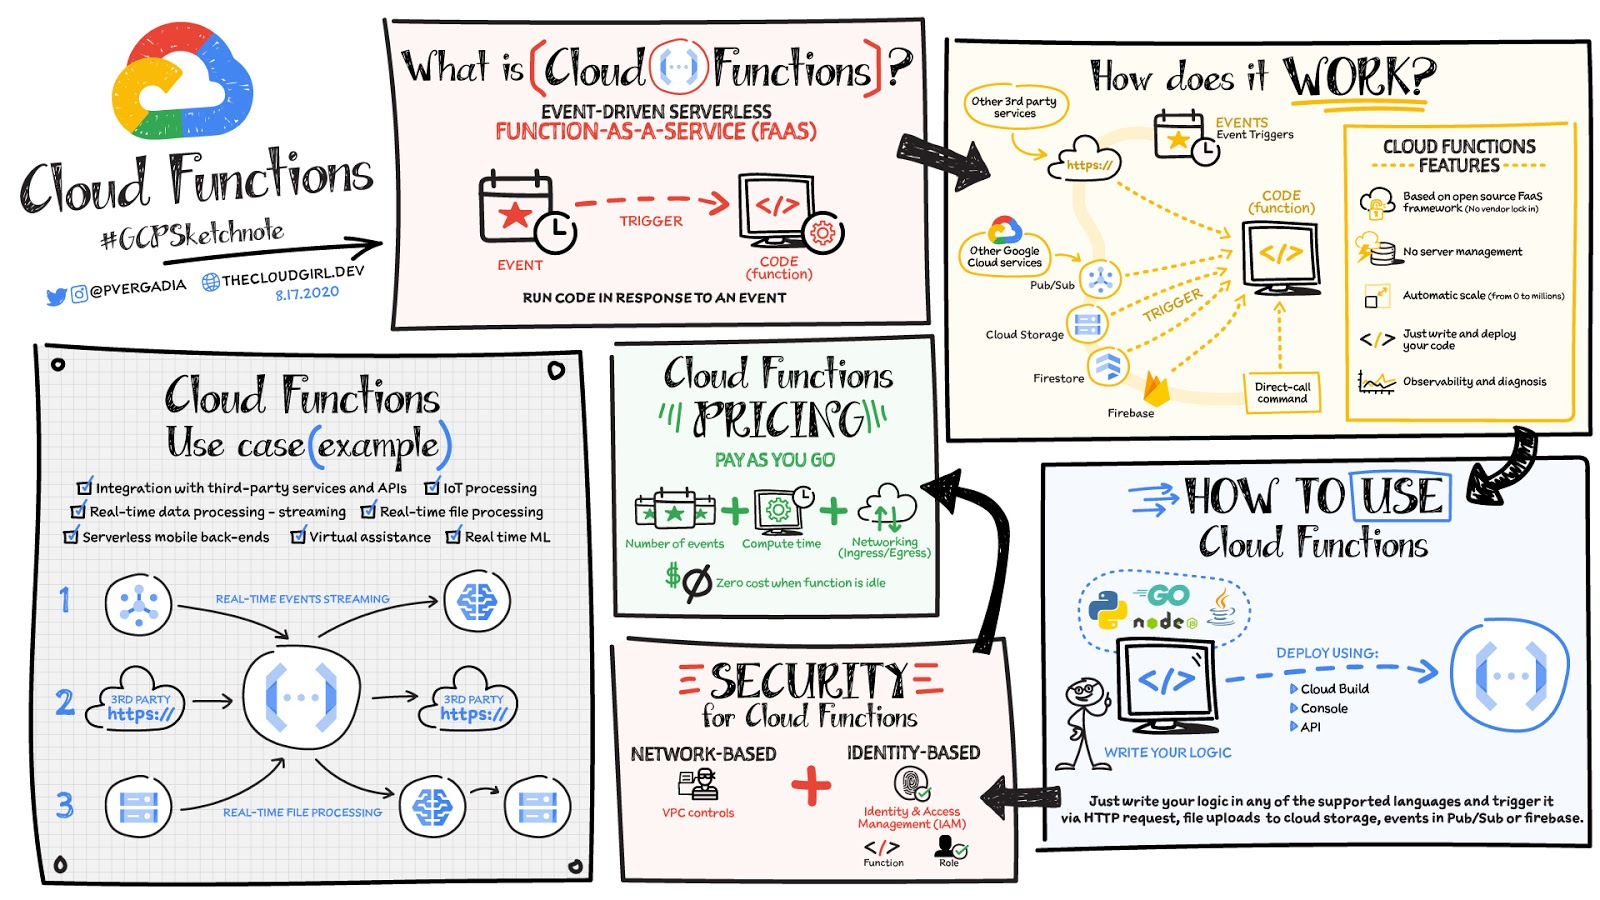

https://cloud.google.com/blog/topics/developers-practitioners/learn-cloud-functions-snap

## Código fonte Python da nossa function (GCP - Cloud Run Functions)

Esta função recebe um parametro `num` via method POST ou GET e retorna alguns dados estatísticos sobre a lista de números, é eperado como parametro uma lista de números inteiros ou float. 

```python
import functions_framework
from datetime import datetime
import statistics
import random
import re

# Reference: https://github.com/GoogleCloudPlatform/functions-framework-python

@functions_framework.http
def hello_http(request):
    """HTTP Cloud Function.
    Args: 
        num list of numbers

    Insper Data Science Deploy    
    """
    request_json = request.get_json(silent=True)
    request_args = request.args

    response_headers = {'Content-Type': 'application/json'}

    work_num = []

    if request.method == 'POST':
        work_num = request_json["num"]
    elif request.method == 'GET':
        if request_args["num"] != "":
            work_num = [float(x) if '.' in x else int(x) for x in re.findall(r'[+-]?\d*\.?\d+', request_args["num"])]
    else:
        return (f'{{"ops":"{request.method} - {str(datetime.now())}"}}', 405,response_headers)

    if len(work_num) <= 0:    
       work_num = [random.randint(-100, 100) for x in range(10)]

    out_json = dict()
    
    out_json["company"]='Insper'
    out_json["now"]=str(datetime.now())
    out_json["num"]=work_num
    out_json["sum"]=sum(work_num)
    out_json["stdeviation"]=statistics.stdev(work_num)
    out_json["median"]=statistics.median(work_num)
    out_json["http_method"]=request.method

    return (out_json, 200, response_headers)



```

Arquivo requests.txt

```
functions-framework==3.*
```


### Verbos HTTP

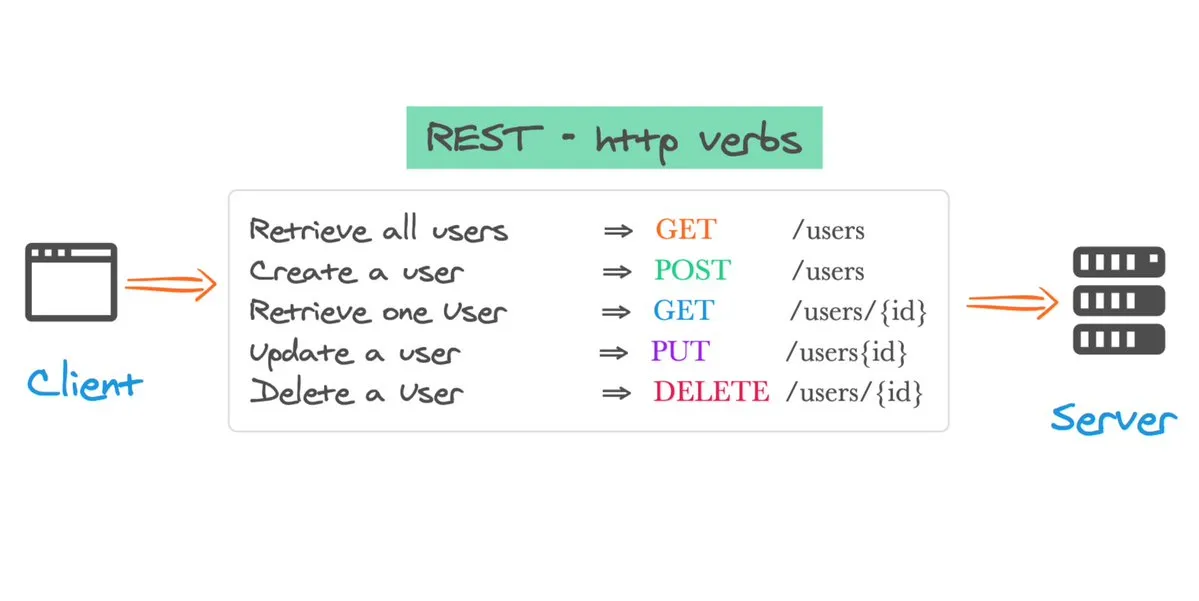

https://codestreet.io/p/understanding-http-verbs-a-guide

## WEB API chamada com `requests`

Testando as chamadas de WEB API - GCP Cloud Run Functions com `requests`

In [58]:
import requests

requests.get("https://insper-func-stats-609751283897.us-east1.run.app?num=['Vai Corinthians!!',10,20,30,44,-10,00.5]").text

'{"company":"Insper","http_method":"GET","median":15.0,"now":"2025-04-15 03:54:37.756892","num":[10,20,30,44,-10,0.5],"stdeviation":19.73765436925067,"sum":94.5}\n'

In [60]:
requests.get("https://insper-func-stats-609751283897.us-east1.run.app?num=10,20,30,44,-10,0.5").json()

{'company': 'Insper',
 'http_method': 'GET',
 'median': 15.0,
 'now': '2025-04-15 03:54:55.872940',
 'num': [10, 20, 30, 44, -10, 0.5],
 'stdeviation': 19.73765436925067,
 'sum': 94.5}

In [67]:
info = {"num":[100, 200, 300, -20, 0.5, 1000]}

requests.post("https://insper-func-stats-609751283897.us-east1.run.app", data=info).text

'500 Internal Server Error: The server encountered an internal error and was unable to complete your request. Either the server is overloaded or there is an error in the application.'

In [62]:
requests.delete("https://insper-func-stats-609751283897.us-east1.run.app").json()

{'ops': 'DELETE - 2025-04-15 03:55:43.477403'}

In [63]:
requests.delete("https://insper-func-stats-609751283897.us-east1.run.app").text

'{"ops":"DELETE - 2025-04-15 03:55:45.990740"}'

In [66]:
requests.put("https://insper-func-stats-609751283897.us-east1.run.app").text

'{"ops":"PUT - 2025-04-15 03:55:55.885179"}'

In [65]:
requests.put("https://insper-func-stats-609751283897.us-east1.run.app").json()

{'ops': 'PUT - 2025-04-15 03:55:53.451799'}

## WEB API chamada com Firefox

Teste no browser Firefox

Lembra-se que o browser só envia requisição na URL pelo methodo GET

Note que pelo método GET, o parametro na URL chave=valor é recebido como string, texto, e é processado por regexp para considerar somente os números (digitos) e ignorar o resto...

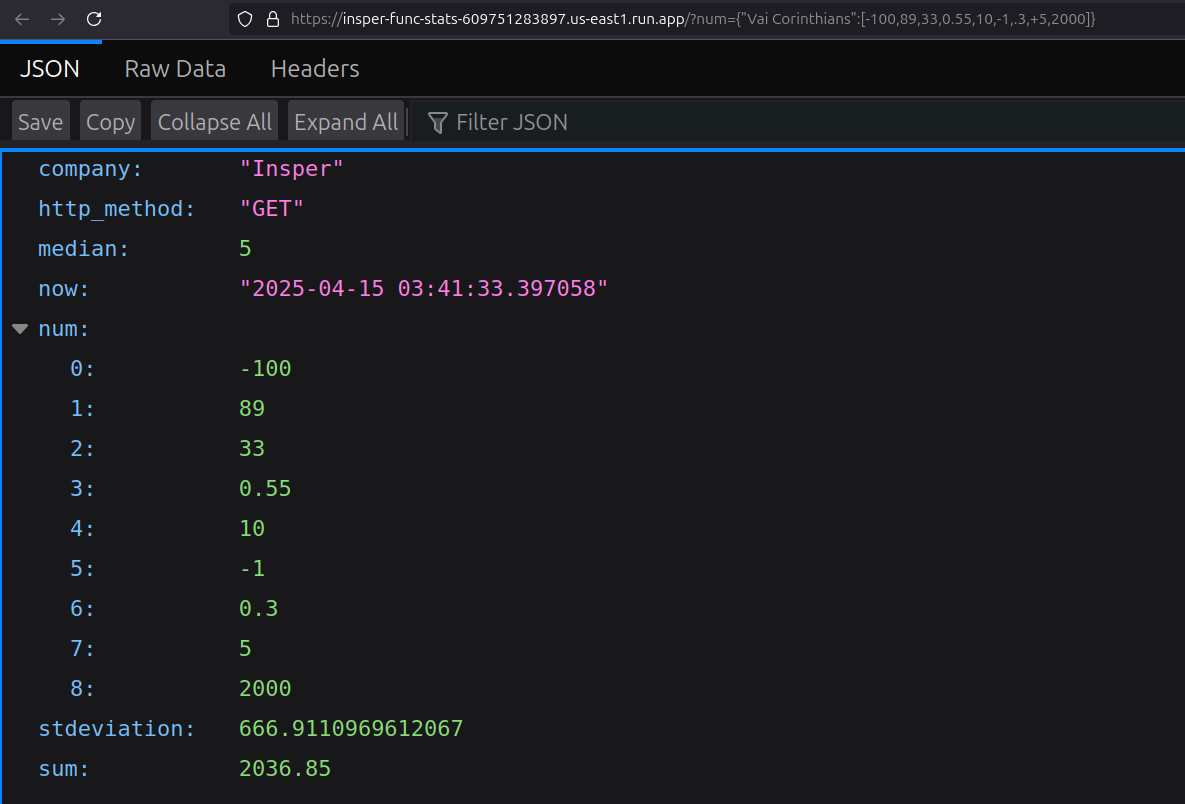

Pelo Firefox podemos também ver os headers do protocolo HTTP, de envio e recebimento (request e response respectivamente):

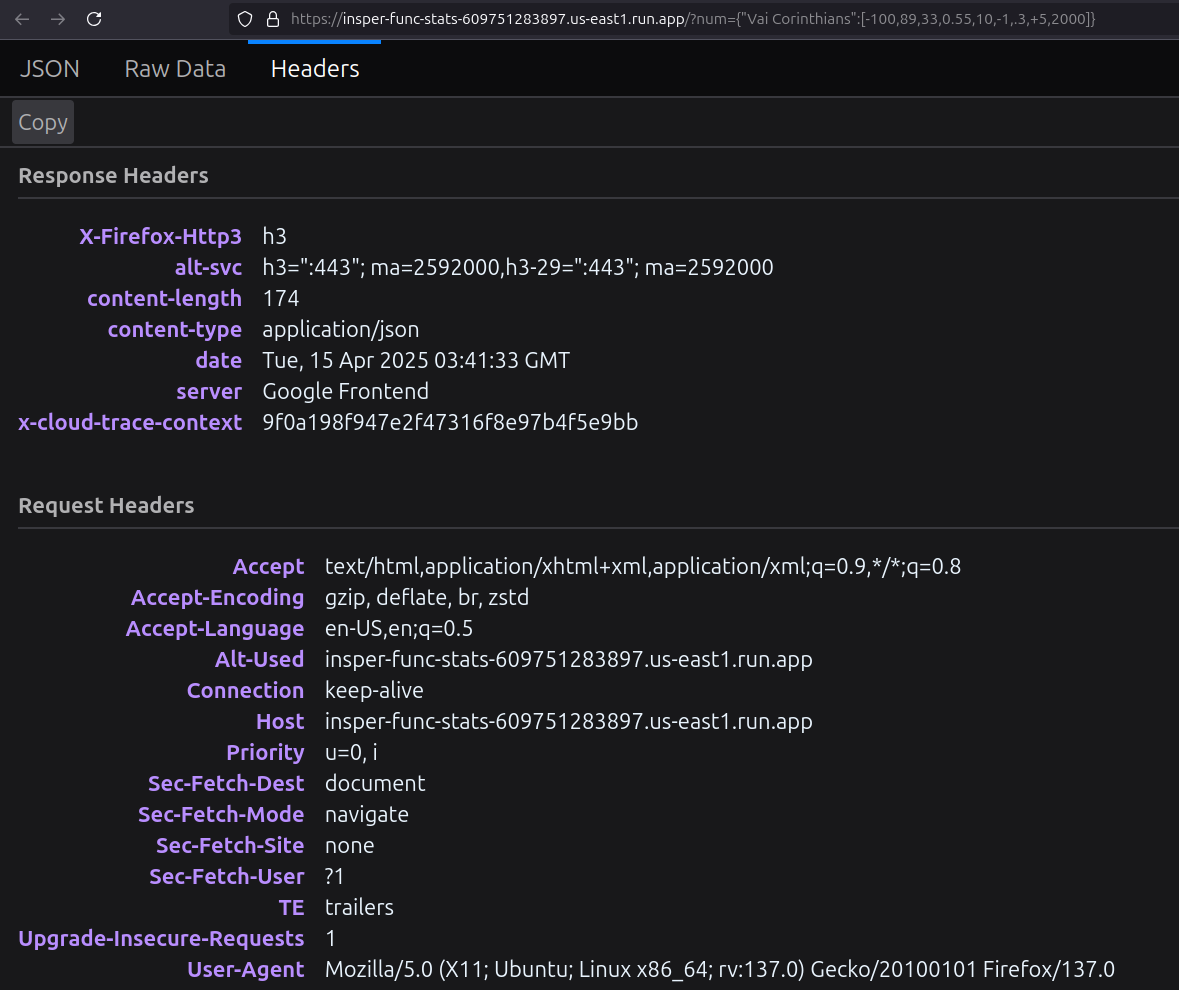

## WEB API chamada com Chrome

Também usando método HTTP GET

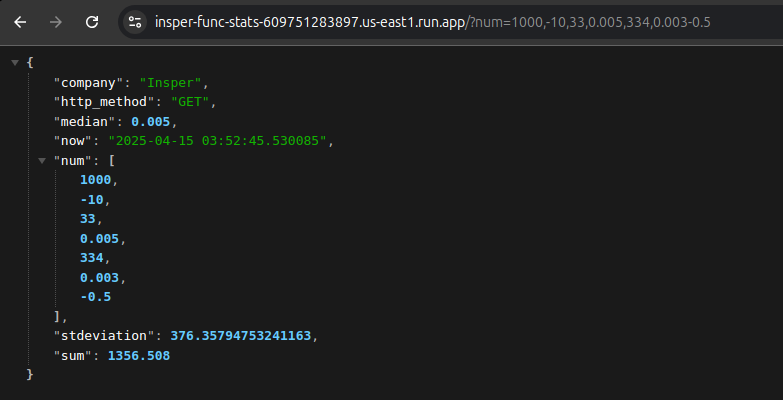

## WEB API chamada com Postman

Podemos instalar o Postman no Windows, Mac ou Linux (mas não no WLS2 que é só via terminal)

O postman é uma ferramenta importante e bastante útil para teste de WEB API

https://www.postman.com/

POST

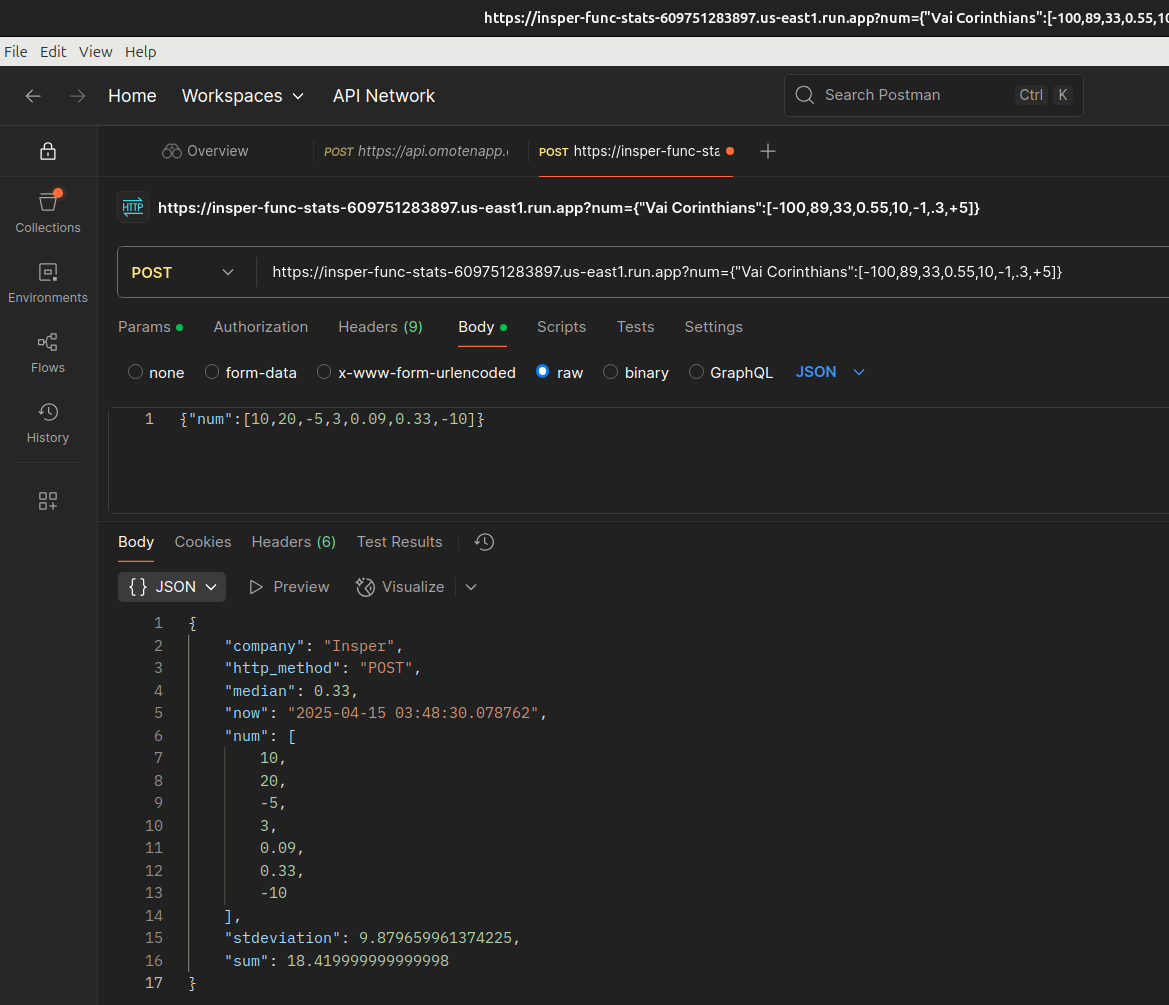

GET

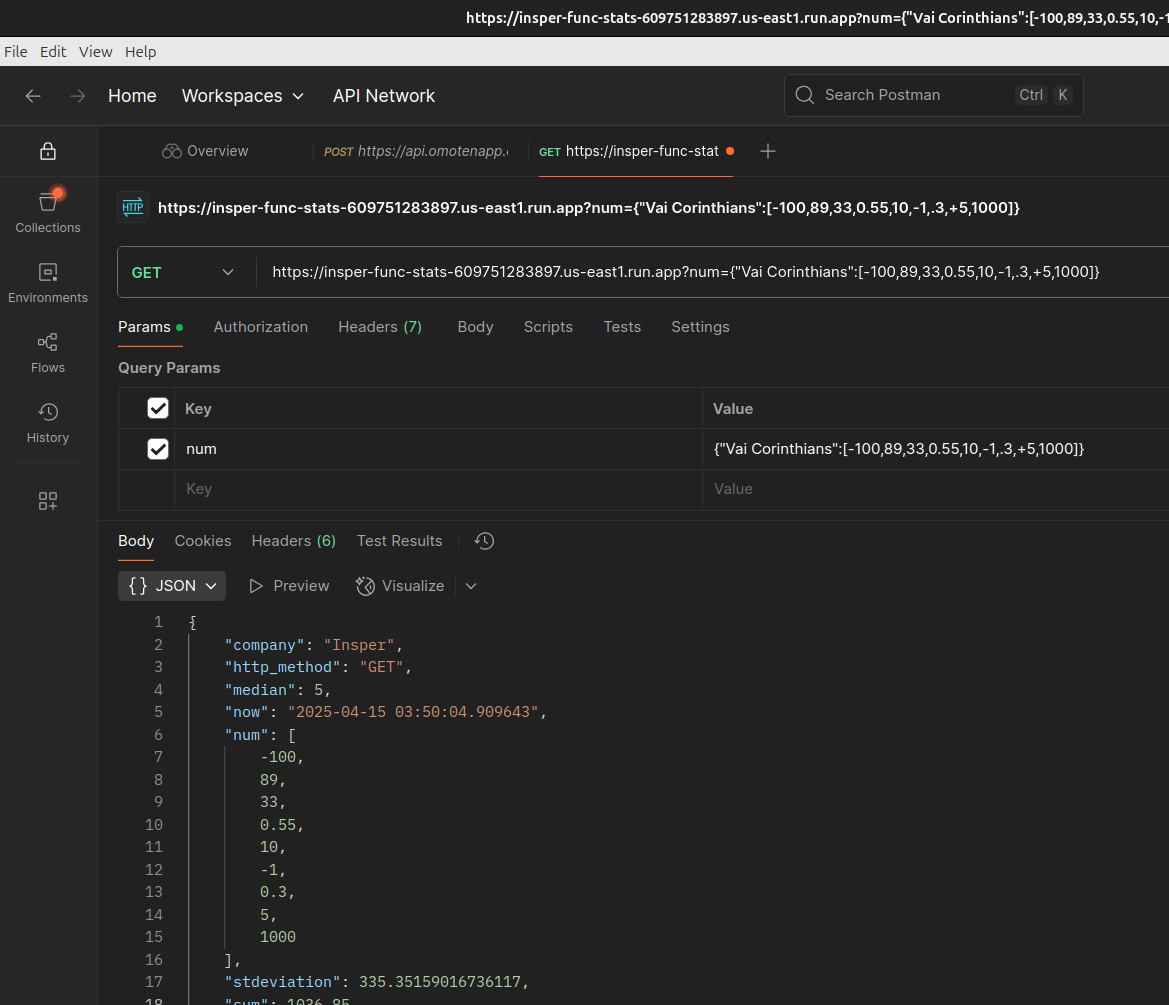

DELETE

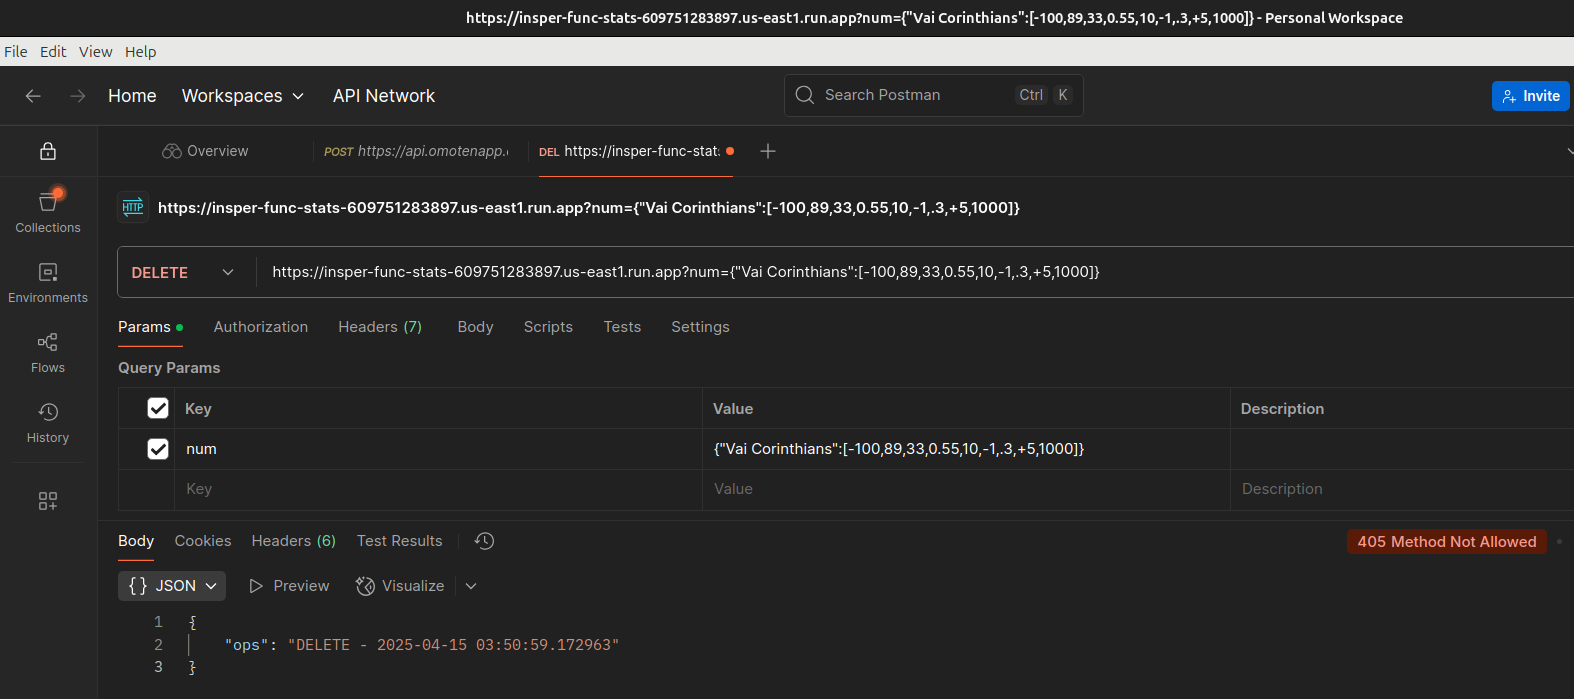

PUT

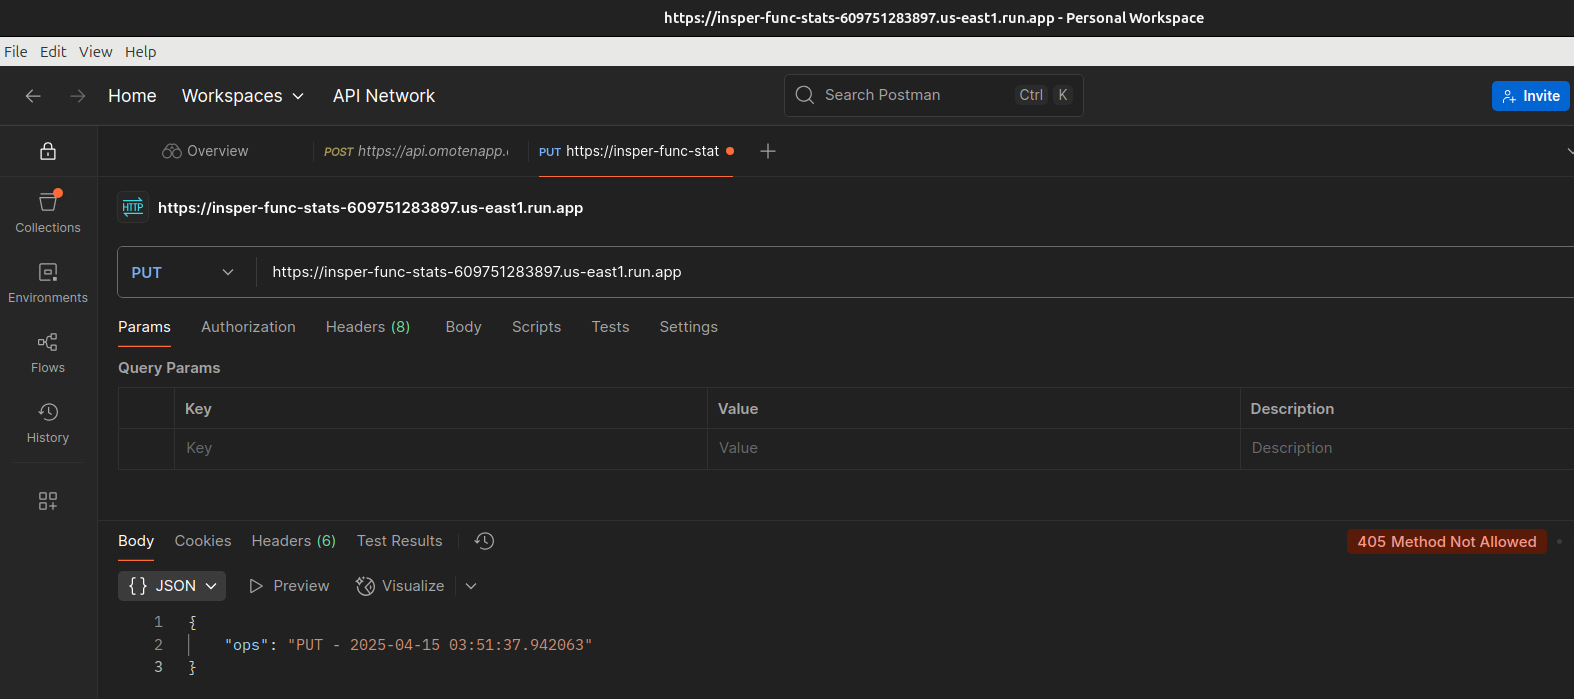

## WEB API chamada no VS Code com plutin REST Client

Teste dentro do próprio VS Code

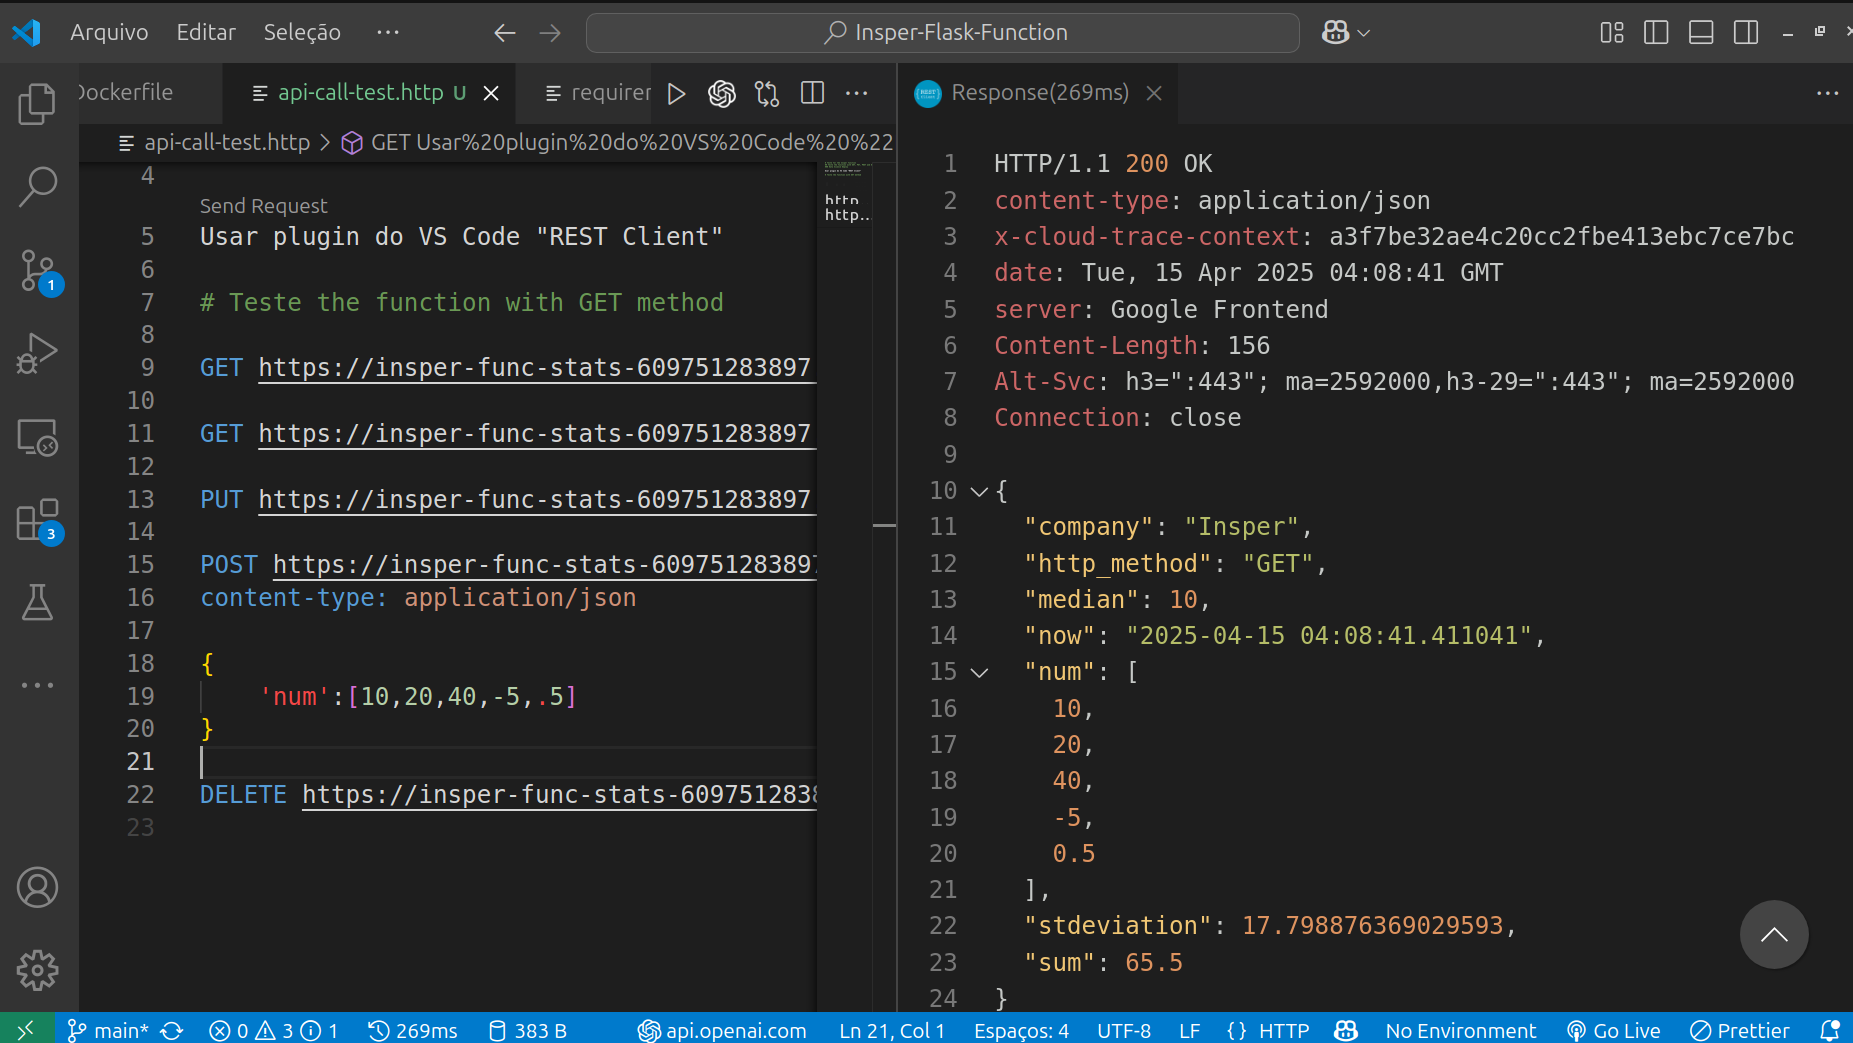

## WEB API chamada com curl

No painel no Cloud Run Functions tem um botão de teste, ele gera um código de teste para o terminal com o curl:

```bash
curl -X POST https://insper-func-stats-609751283897.us-east1.run.app \
-H "Authorization: bearer $(gcloud auth print-identity-token)" \
-H "Content-Type: application/json" \
-d '{
  "num": [10,20,50,1000,0.5,-90]
}'
```
O painel do Cloud Run Functions abre um terminal online CLOUD SHELL para testes:

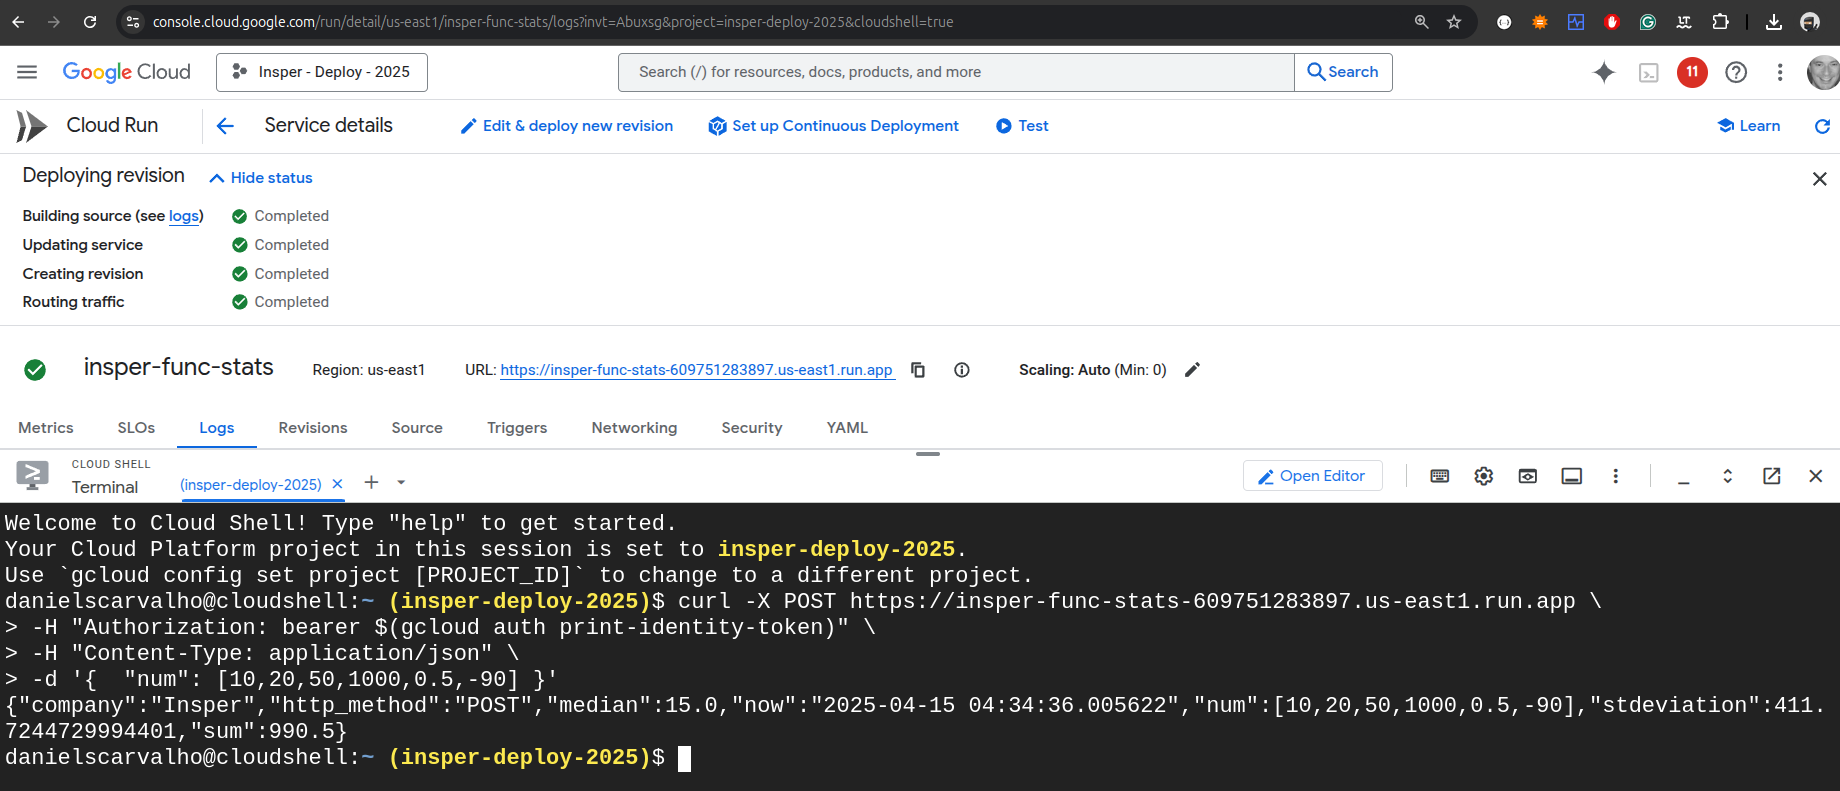

No PC local (Windows, Mac ou Linux) também funciona chamar a função via curl:

```bash
curl -X POST https://insper-func-stats-609751283897.us-east1.run.app \
-H "Content-Type: application/json" \
-d '{
  "num": [10,20,50,1000,0.5,-90]
}'

{"company":"Insper","http_method":"POST","median":15.0,"now":"2025-04-15 04:38:21.880209","num":[10,20,50,1000,0.5,-90],"stdeviation":411.7244729994401,"sum":990.5}

```

Como fazer deploy no Cloud Run Functions com o GCP CLI, na pasta do código fonte:

```bash
gcloud functions deploy hello-function \
  --gen2 \
  --region=us-east1 \
  --runtime=python312 \
  --source=. \
  --entry-point=hello_function \
  --trigger-http
```

https://cloud.google.com/functions/docs/deploy?hl=pt-br

Como fazer deploy de funções no Azure:

[Aula02_Deploy_Function_VSCode_Azure.ipynb](Aula02_Deploy_Function_VSCode_Azure.ipynb)

O Cloud Play Functions também pode fazer CI/CD com código no GitHub, e atualizar, fazer o deploy quando o código é atualizado...

![](img/GCP-Fun-GitHub.png)

Com a implantação contínua (continuous deployment/continuous integration) fornecida pelo Cloud Build, as alterações no seu repositório de origem são automaticamente incorporadas em imagens de contêiner no Artifact Registry e implantadas no Cloud Run.
Seu código deve atender a solicitações HTTP em $PORT. Seu repositório deve incluir um Dockerfile ou código-fonte em Go, Node.js, Python, Java, .NET Core ou Ruby para ser incorporado a uma imagem de contêiner.

As funções podem ser chamadas por:
- Applicativo
- WEB Site
- Integrações
- Outras WEB APIs
- Jupyter notebook em projetos de ciências dos dados

Os containers são STATELESS, ou seja, não salvam dados no próprio contaider, pois os conteiners são voláteis, é necessário acesso a banco de dados ou sistema de arquivos para persistência de dados.

## Microserviço

Um microserviço é uma abordagem arquitetural de desenvolvimento de software em que uma aplicação é dividida em pequenos serviços independentes, cada um responsável por uma funcionalidade específica. Esses serviços são altamente modulares, comunicam-se por meio de APIs bem definidas, geralmente via protocolos como HTTP ou mensagens, e podem ser desenvolvidos, implantados e escalados de forma autônoma. Essa arquitetura promove flexibilidade, facilita a manutenção, permite o uso de diferentes tecnologias para cada serviço e suporta a entrega contínua, sendo amplamente utilizada em sistemas distribuídos modernos.



É importante lembrar que o Cloud Run Functions roda em ambiente docker, mas é um serviço em nuvem de mais alto nível, onde a configuração do container é abstraida.

Os serviços SERVERLESS de todos os ambientes em nuvem rodam sobre conteiners (Dockers).

Referências:

- https://cloud.google.com/functions
- https://reviewnprep.com/blog/aws-lambda-vs-azure-functions-vs-google-cloud-functions/
- https://cloud.google.com/hosting-options/
- https://www.postman.com/
- https://developer.mozilla.org/en-US/docs/Web/HTTP/Reference/Methods
- https://www.w3schools.com/whatis/whatis_http.asp
- https://github.com/GoogleCloudPlatform/functions-framework-python
